# Machine Learning from the Titanic Disaster

## Importing necessary libraries

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
pd.set_option('display.max_columns', None)

plt.style.use('ggplot')
sns.set_palette('husl')

# Task 1: Data Exploration and Visualization 
## 1. Load the data

In [219]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Inspect Data

In [220]:
def inspect_data(df: pd.DataFrame):
  display(df.head())
  display(df.info())

# inspect the training data
inspect_data(df_train)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


None

#####  Upon inspection, I can see the df_train and df_test have same columns but df_test does not have survival, that means i can use same data cleaning and data processing of df_train on df_test too

## 2. Analyze key statistics for each feature

In [221]:
display(df_train.describe(include="all")) # Show the summary statistics of the numerical columns
display(df_train.select_dtypes(include=['number']).median()) # Show the median of the numerical columns separately since it's not included in the describe method

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,712.000000,712.000000,712,712,575.000000,712.000000,712.000000,712,712.000000,160,710,712.000000
unique,NaN,NaN,712,2,NaN,NaN,NaN,571,NaN,127,3,NaN
top,NaN,NaN,"Lam, Mr. Ali",male,NaN,NaN,NaN,1601,NaN,G6,S,NaN
freq,NaN,NaN,1,459,NaN,NaN,NaN,6,NaN,4,516,NaN
mean,444.405899,2.308989,NaN,NaN,29.807687,0.492978,0.390449,NaN,31.819826,NaN,NaN,0.383427
std,257.465527,0.833563,NaN,NaN,14.485211,1.060720,0.838134,NaN,48.059104,NaN,NaN,0.486563
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,222.750000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,439.500000,3.000000,NaN,NaN,28.500000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,667.250000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


PassengerId    439.5000
Pclass           3.0000
Age             28.5000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Survived         0.0000
dtype: float64

#### The code below shows the unique values of the categorical columns that have 10 or fewer unique values which are easier to analyze and visualize

In [222]:

categorical_columns = df_train.select_dtypes(include = ['object']).columns
for column in categorical_columns:
    if df_train[column].nunique()<=10:
        print(f'{column}: {df_train[column].unique()}')

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


#### The code below shows the unique values of the numerical columns that have 10 or fewer unique values which are easier to analyze and visualize

In [223]:
numerical_columns = df_train.select_dtypes(include = ['int64', 'float64']).columns
for column in numerical_columns:
    if df_train[column].nunique()<=10:
        print(f'{column}: {df_train[column].unique()}')

Pclass: [3 2 1]
SibSp: [0 1 8 3 4 2 5]
Parch: [0 1 2 5 3 4 6]
Survived: [1 0]


### Extract useful Data from columns before dropping them

In [224]:
# Extract titles from the 'Name' column
df_train['Title'] = df_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Display unique titles in the training dataset
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Col', 'Miss', 'Rev', 'Major', 'Master', 'Dr', 'Mlle',
       'Lady', 'Sir', 'Ms', 'Jonkheer', 'Don'], dtype=object)

In [ ]:
# Query the dataframe to see who the unfamiliar titles are for accurate classification, if necessary google to find more about the title

# df_train.query('Title == "Jonkheer"')
# df_train.query('Title == "Mlle"')
df_train.query('Title == "Rev"')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
33,151,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,0,Rev
83,627,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,0,Rev
133,849,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,0,Rev
220,250,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,0,Rev
525,150,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,0,Rev


### Titles like Dona, Mrs, Miss can be classified as Single Title for eg. Miss Titles like Lady Countess Sir can be classified as Single Title for eg. Honor

In [226]:
def classify_by_title(df: pd.DataFrame):
    title_mapping = {
        'Mlle': 'Miss',
        'Mme': 'Mrs', 
        'Ms': 'Mrs',
        'Dona': 'Mrs',
        'Don': 'Mr',
        'Jonkheer': 'Mr',
        'Capt': 'Military',
        'Rev': 'Professional', 
        'Major': 'Military',
        'Col': 'Military',
        'Dr': 'Professional', 
        'Lady': 'Noble',
        'Countess': 'Noble',
        'Sir': 'Noble'
    }
    df["Title"] = df["Title"].replace(title_mapping)
    return df

df_train =  classify_by_title(df_train)
df_test = classify_by_title(df_test)
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Military', 'Miss', 'Professional', 'Master', 'Noble'],
      dtype=object)

In [227]:
# Drop the columns that are not useful for the analysis
df_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

## 3. Visualize relationships between features

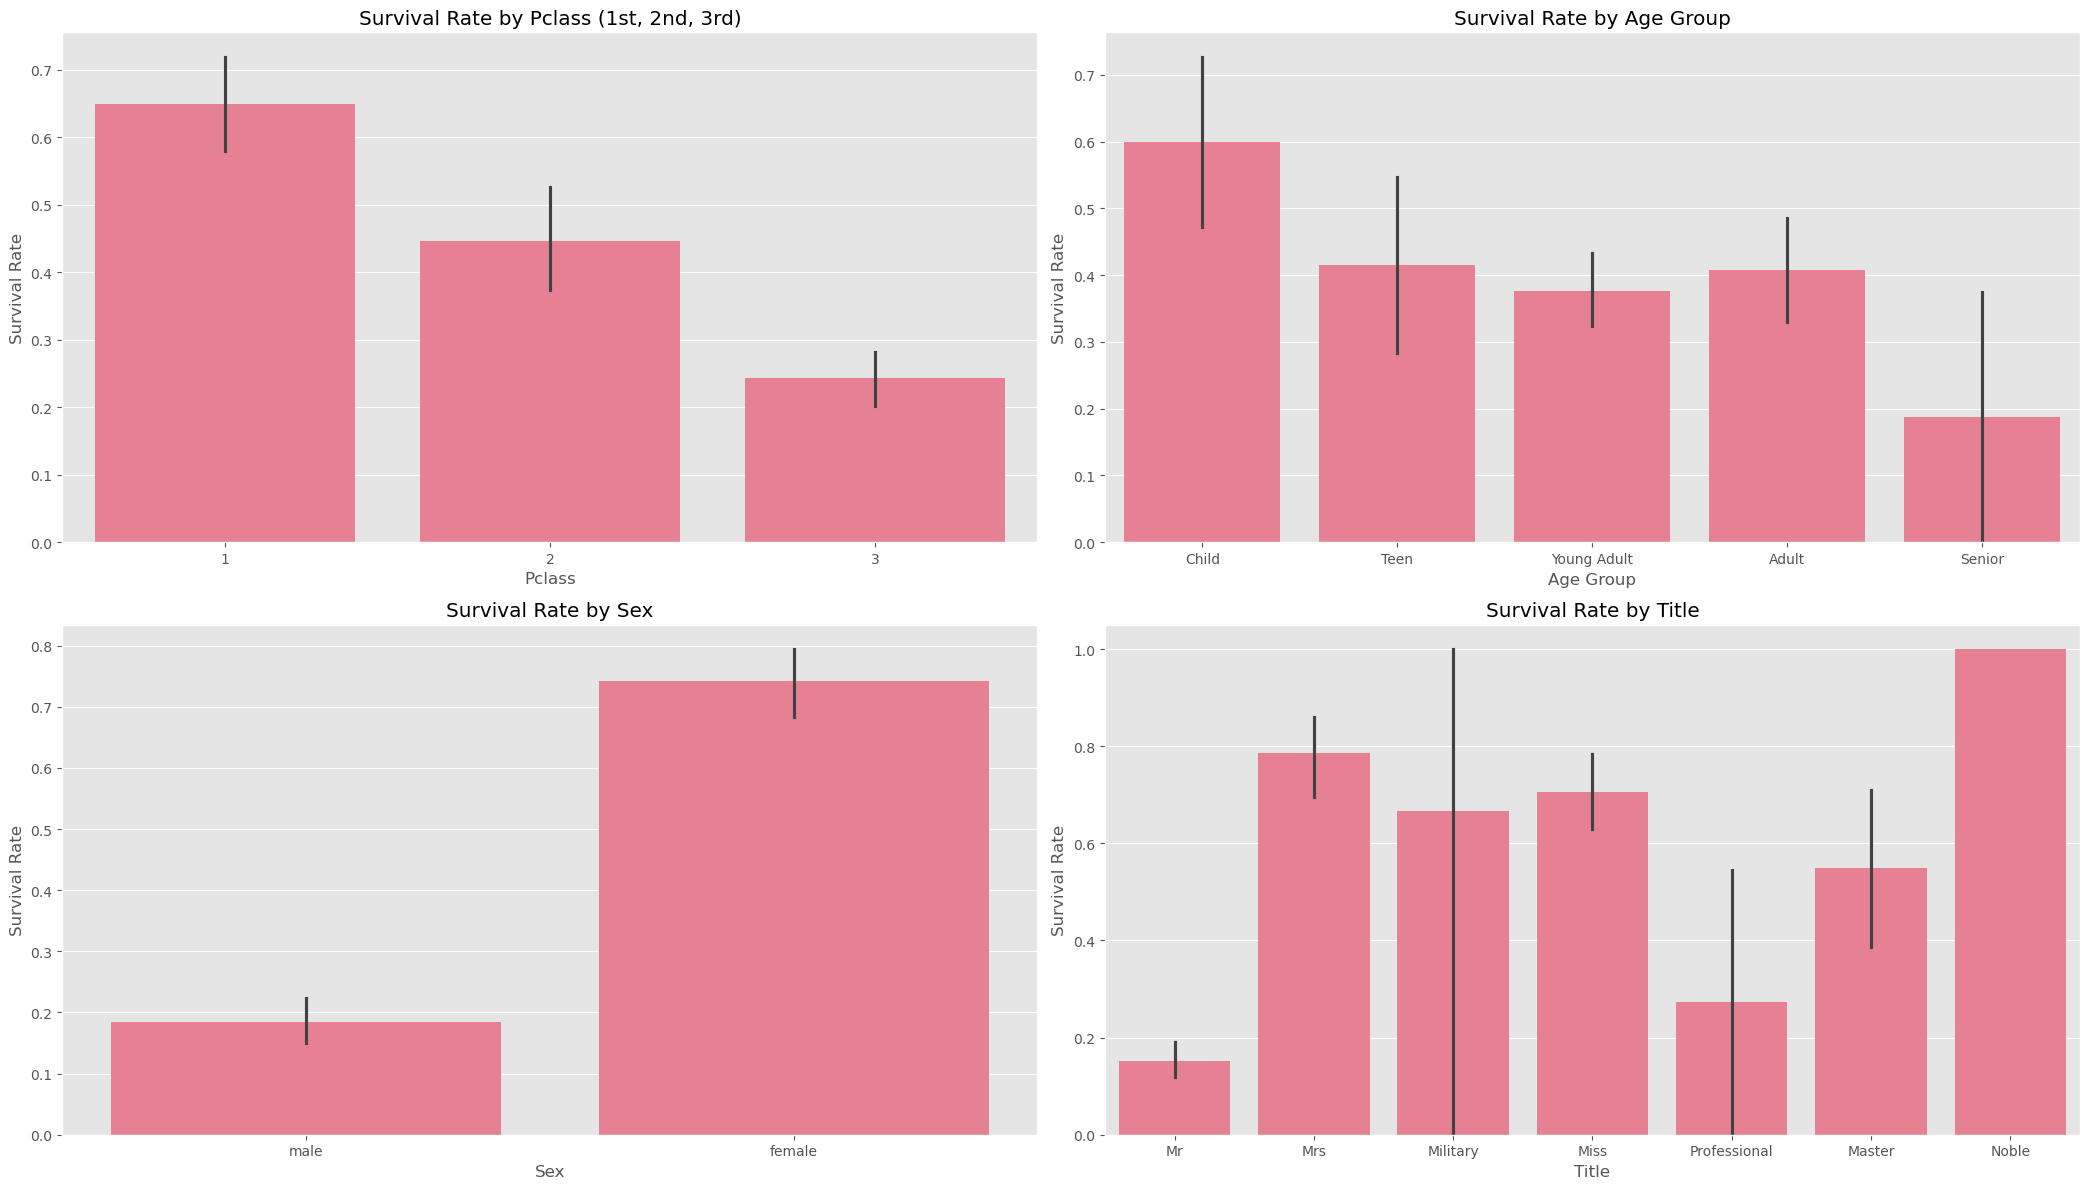

In [228]:
fig, axes = plt.subplots(2, 2, figsize=(21, 12))

# Plot Survival Rate by Pclass
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df_train)
axes[0, 0].set_title('Survival Rate by Pclass (1st, 2nd, 3rd)')
axes[0, 0].set_xlabel('Pclass')
axes[0, 0].set_ylabel('Survival Rate')

# Plot Survival Rate by Sex
sns.barplot(ax=axes[1, 0], x='Sex', y='Survived', data=df_train)
axes[1, 0].set_title('Survival Rate by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Survival Rate')

# Plot Survival Rate by Age
# Create age groups
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Plot Survival Rate by Age Group
sns.barplot(ax=axes[0, 1], x='AgeGroup', y='Survived', data=df_train)
axes[0, 1].set_title('Survival Rate by Age Group')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Survival Rate')

# Plot Survival Rate by Title
sns.barplot(ax=axes[1, 1], x='Title', y='Survived', data=df_train)
axes[1, 1].set_title('Survival Rate by Title')
axes[1, 1].set_xlabel('Title')
axes[1, 1].set_ylabel('Survival Rate')

# Display the plots
plt.tight_layout()
plt.show()

# Task 2: Data Cleaning and Preprocessing
## 1. Handle Missing values

In [229]:
df_train.isnull().sum().sort_values(ascending=False) # Show the number of missing values in each column and sort them in descending order

Age         137
AgeGroup    137
Embarked      2
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Survived      0
Title         0
dtype: int64

In [230]:
display(df_train.head()) # Show the first 5 rows of the dataframe
# df_test.head() # Show the first 5 rows of the dataframe
display(df_train.info()) # Show the information about the dataframe after the changes

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,AgeGroup
0,3,male,NaN,0,0,56.4958,S,1,Mr,NaN
1,2,male,NaN,0,0,0.0000,S,0,Mr,NaN
2,1,male,NaN,0,0,221.7792,S,0,Mr,NaN
3,3,female,18.0,0,1,9.3500,S,1,Mrs,Teen
4,2,female,31.0,1,1,26.2500,S,1,Mrs,Young Adult


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    int64   
 1   Sex       712 non-null    object  
 2   Age       575 non-null    float64 
 3   SibSp     712 non-null    int64   
 4   Parch     712 non-null    int64   
 5   Fare      712 non-null    float64 
 6   Embarked  710 non-null    object  
 7   Survived  712 non-null    int64   
 8   Title     712 non-null    object  
 9   AgeGroup  575 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 51.1+ KB


None

## 2. Encode the categorical variables

In [231]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
def encode_categorical(df: pd.DataFrame):
    le = LabelEncoder()
    is_categorical = (df.dtypes == 'object') | (df.dtypes == "category")
    categorical_cols = list(is_categorical[is_categorical].index)
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

df_train = encode_categorical(df_train)
df_test = encode_categorical(df_test)
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,AgeGroup
0,3,1,NaN,0,0,56.4958,2,1,3,5
1,2,1,NaN,0,0,0.0000,2,0,3,5
2,1,1,NaN,0,0,221.7792,2,0,3,5
3,3,0,18.0,0,1,9.3500,2,1,4,3
4,2,0,31.0,1,1,26.2500,2,1,4,4
...,...,...,...,...,...,...,...,...,...,...
707,3,0,NaN,0,0,7.8792,1,1,2,5
708,1,0,35.0,0,0,512.3292,0,1,2,4
709,3,0,48.0,1,3,34.3750,2,0,4,0
710,1,1,47.0,0,0,38.5000,2,0,3,0


### Handle Missing values

In [232]:
from sklearn.impute import SimpleImputer

# Impute missing values in the 'Age', 'AgeGroup', 'Embarked'
imputer = SimpleImputer(strategy='median')
def impute_missing_values(df: pd.DataFrame):
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['AgeGroup'] = imputer.fit_transform(df[['AgeGroup']])
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    return df

df_train = impute_missing_values(df_train)
df_test = impute_missing_values(df_test)
df_train.isnull().sum().sort_values(ascending=False)
# df_test.isnull().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
Title       0
AgeGroup    0
dtype: int64

In [233]:
#  Separate the features and the target variable
features = df_train.drop(['Survived'], axis=1)
target = df_train.Survived

In [234]:
# features.head() # Show the first 5 rows of the 
# target.head() # Show the first 5 rows of the target variable
features.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int32  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int32  
 7   Title     712 non-null    int32  
 8   AgeGroup  712 non-null    float64
dtypes: float64(3), int32(3), int64(3)
memory usage: 41.8 KB


## Task 3: Feature Engineering 

## 1. Generate new features

In [235]:
def create_new_features(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.copy()
    df_new['FamilySize'] = df['SibSp'] + df['Parch'] + 1  
    df_new['isAlone'] = df_new['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
    # The following has already been done above
    # df_new['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
    # df_new['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    return df_new

features = create_new_features(features)
df_test = create_new_features(df_test)
# features.head()
# features.info()
# features['isAlone'].unique()
# features.isnull().sum().sort_values(ascending=False) # Show the number of missing values in each column
# df_test

### Perform feature selection using correlation analysis

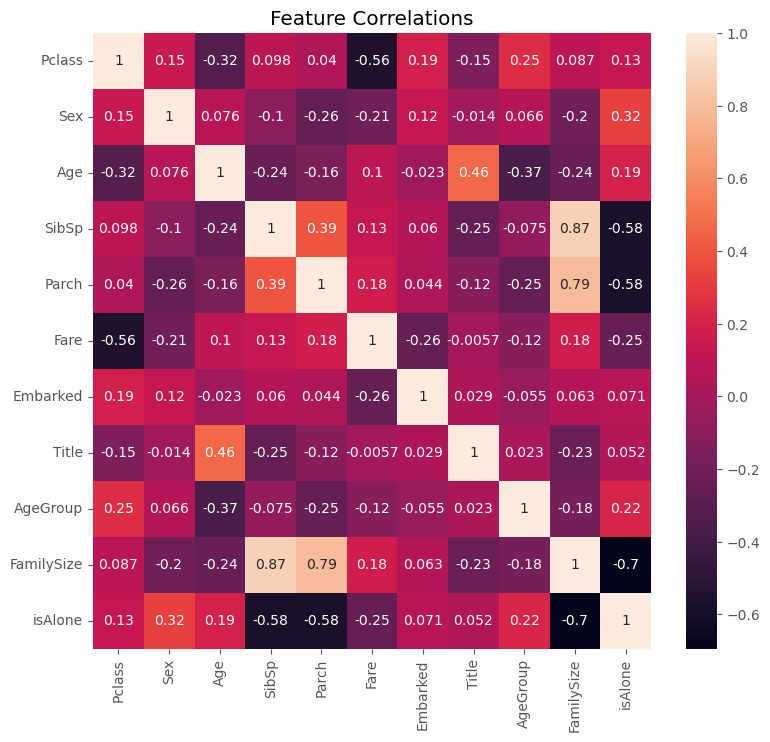

In [236]:
# Check correlations between features
correlation_matrix = features.corr()

# Visualize correlations
plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlations')
plt.show()

### Remove highly correlated features (e.g. >0.7)

In [237]:
features.drop(['SibSp', 'Parch'], axis=1, inplace=True) # Drop highly correlated features to avoid redundancy
features.head()
df_test.drop(['SibSp', 'Parch'], axis=1, inplace=True) 
X_cols = features.columns

## 3. Normalize/scale numerical features.

In [238]:
# ## 3. Normalize/scale numerical features.
from sklearn.preprocessing import StandardScaler
def scale_numerical(df: pd.DataFrame):
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    return df

features = scale_numerical(features)
df_test = scale_numerical(df_test)
features

array([[ 0.82956755,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555],
       [-0.37094484,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555],
       [-1.57145722,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555],
       ...,
       [ 0.82956755, -1.34693328,  1.41700669, ..., -1.52973057,
         1.96266345, -1.24946032],
       [-1.57145722,  0.74242727,  1.34017889, ..., -1.52973057,
        -0.55633858,  0.80034555],
       [-1.57145722,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555]])

## 4. Split the dataset into training and validation sets.

In [239]:
# Split the dataset into training and validation sets.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

### Perform further feature selection using Random Forest Classifier to identify the most important features in the dataset and drop the least important ones. With this, we can improve the model's performance and reduce overfitting.

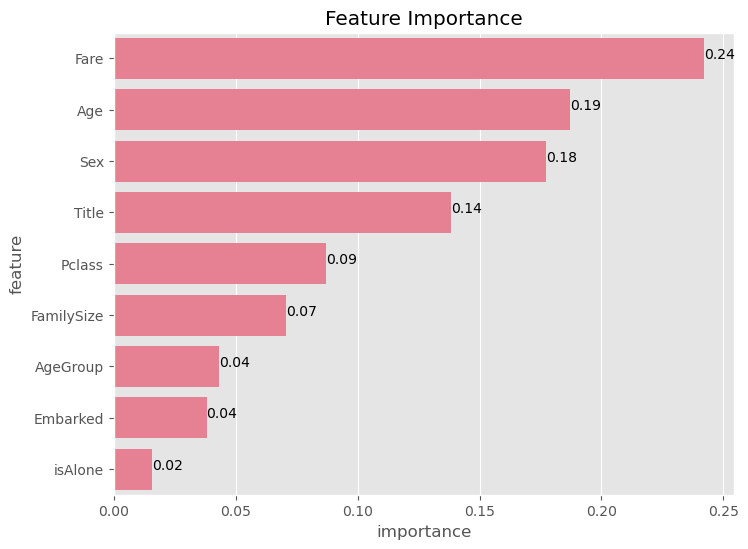

In [240]:
# Feature importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Convert X_train back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_cols)

# Plot feature importances for better visualization
importances = pd.DataFrame({
    'feature': X_train_df.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=importances, x='importance', y='feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for index, value in enumerate(importances['importance']):
    plt.text(value, index, f'{value:.2f}')

plt.show()

# Select top features
selected_features = importances[importances['importance'] > 0.08]['feature'].tolist()
X_train_selected = X_train_df[selected_features]

### I chose 0.08 as the threshold because it's the point where the importance values start to drop significantly 

In [241]:
selected_features 

['Fare', 'Age', 'Sex', 'Title', 'Pclass']

In [242]:
# Perform another split with the selected features
X_train_selected, X_val_selected, y_train, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Task 4: Model Selection and Training

## Trained three different models and displayed the result 

In [243]:
# Logistic Regression, Random Forest, Support, Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    
    # Fit model and make predictions 
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)
    y_pred_proba = model.predict_proba(X_val_selected)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1': f1_score(y_val, y_pred),
        'ROC-AUC': roc_auc_score(y_val, y_pred_proba),
        'CV Score': cv_scores.mean(),
    }

# Display results
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1,ROC-AUC,CV Score
Logistic Regression,0.842105,0.756757,0.756757,0.756757,0.810284,0.791209
Random Forest,0.807018,0.692308,0.729730,0.710526,0.835732,0.789011
SVM,0.789474,0.658537,0.729730,0.692308,0.833801,0.802198


# Task 5: Model Optimization

In [244]:
from sklearn.model_selection import RandomizedSearchCV


# Parameter grids for Randomized Search CV
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'max_iter': [100, 200, 300]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
}

# Randomized Search CV for each model using the parameter grids
best_models = {}
for name, model in models.items():
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grids[name],
        n_iter=20,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train_selected, y_train)
    
    print(f"\n{name} Results:")
    print(f"Best Score: {random_search.best_score_:.3f}")
    print(f"Best Parameters: {random_search.best_params_}")
    
    best_models[name] = random_search.best_estimator_


Logistic Regression Results:
Best Score: 0.796
Best Parameters: {'max_iter': 100, 'C': 0.1}

Random Forest Results:
Best Score: 0.813
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}

SVM Results:
Best Score: 0.802
Best Parameters: {'kernel': 'rbf', 'C': 1}


## Evaluate optimized models on the validation dataset

In [245]:
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_val_selected)
    results[name] = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1 Score': f1_score(y_val, y_pred),
        'ROC-AUC': roc_auc_score(y_val, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.815789,0.735294,0.675676,0.704225,0.779396
Random Forest,0.842105,0.806452,0.675676,0.735294,0.798877
SVM,0.789474,0.658537,0.729730,0.692308,0.773956


In [246]:
for name, model in models.items():
    print(f'The training score for {name} is:', (model.score(X_train_selected, y_train) * 100), '%')
    print('Validation accuracy:', accuracy_score(y_val, model.predict(X_val_selected)))

The training score for Logistic Regression is: 80.87912087912088 %
Validation accuracy: 0.8421052631578947
The training score for Random Forest is: 98.68131868131869 %
Validation accuracy: 0.8070175438596491
The training score for SVM is: 82.85714285714286 %
Validation accuracy: 0.7894736842105263


# Task 6: Testing and Submission

In [247]:
df_test = pd.DataFrame(df_test, columns=X_cols) # Convert the test set back to a DataFrame to make predictions on it

# Make predictions on the test dataset
best_model = best_models['Random Forest']
predictions = best_model.predict(df_test[selected_features])


test_df = pd.read_csv('test.csv') # Load the test dataset to get the 'PassengerId' column

# Create a submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

# Save the submission dataframe to a CSV file
submission.to_csv('Marzuk_submission.csv', index=False)

# Display the first few rows of the submission dataframe
submission.head()

,PassengerId,Survived
0,566,0
1,161,0
2,554,0
3,861,0
4,242,0


In [248]:
submission.tail()

,PassengerId,Survived
174,881,1
175,92,0
176,884,0
177,474,1
178,638,0
